# **Employee Salary Prediction**

## Data Preprocessing

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [77]:
df = pd.read_csv("adult 3.csv")

In [78]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Checking for null values

In [79]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Checking for duplicates

In [80]:
df.duplicated().sum()

np.int64(52)

### Checking the categories of values

#### Occupation

In [81]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

#### Age

In [82]:
df.age.value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

#### Workclass

In [83]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

#### Education

In [84]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

#### Martial Status

In [85]:
df["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [86]:
df.replace({"?":"Others"}, inplace=True)

In [87]:
df.workclass.replace({"Others":"NotListed"},inplace=True)
df.workclass.replace({"?":"NotListed"},inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_19112\3092370737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace({"Others":"NotListed"},inplace=True)


In [88]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K


---

In [89]:
df = df[df["workclass"] != "Without-pay"]
df = df[df["workclass"] != "Never-worked"]

In [90]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

#### income

In [91]:
df.income.value_counts()

income
<=50K    37126
>50K     11685
Name: count, dtype: int64

#### Removing from Education

In [92]:
df.education.value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [93]:
df = df[df["education"] != "Preschool"]
df = df[df["education"] != "1st-4th"]
df = df[df["education"] != "5th-6th"]

In [94]:
df.education.value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64

### As Education is a categorical value, we r deleting it

In [95]:
df.drop(columns=["education"], inplace=True)
df.drop(columns=["fnlwgt"], inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e243815910>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2437c8090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e243693150>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2437caa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2437c9a10>],
 'means': []}

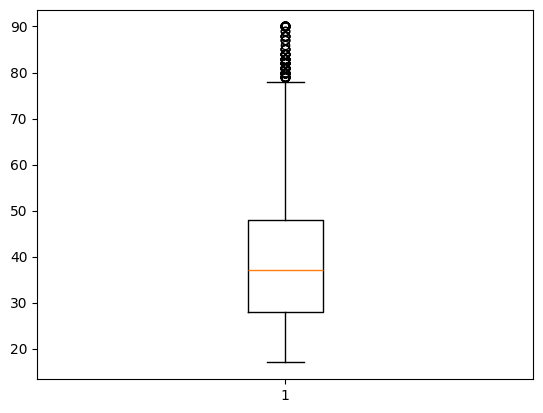

In [96]:
plt.boxplot(df.age) # can see what are the outliers

In [97]:
df = df[(df["age"]<=75) & (df["age"]>=17)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e243789190>,
 'caps': [<matplotlib.lines.Line2D at 0x1e24379b010>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e24378b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e24379ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e243799d50>],
 'means': []}

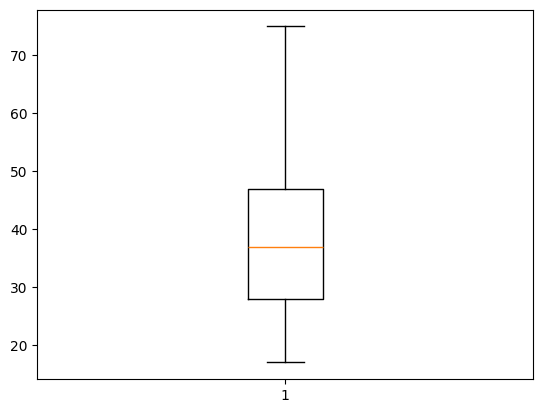

In [98]:
plt.boxplot(df.age)

## Train Test Split

## Label Encoding

In [24]:
encoder = LabelEncoder()
df["workclass"] = encoder.fit_transform(df["workclass"])
df["marital-status"] = encoder.fit_transform(df["marital-status"])
df["occupation"] = encoder.fit_transform(df["occupation"])
df["relationship"] = encoder.fit_transform(df["relationship"])
df["race"] = encoder.fit_transform(df["race"])
df["gender"] = encoder.fit_transform(df["gender"])
df["capital-gain"] = encoder.fit_transform(df["capital-gain"])
df["native-country"] = encoder.fit_transform(df["native-country"])

In [99]:
df1 = df
X = df.drop(columns = ["income"])
Y = df["income"]
df.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [100]:
df1.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K


In [27]:
df.tail()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,3,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,9,4,0,3,4,1,0,0,20,39,<=50K
48841,52,4,9,2,3,5,4,0,111,0,40,39,>50K


### MinMax Scaler

In [28]:
MinMax = MinMaxScaler()
X = MinMax.fit_transform(X)

## Training and Testing Split

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.2, random_state=46, stratify=Y)

In [30]:
Xtest

array([[0.01724138, 0.5       , 0.25      , ..., 0.        , 0.23469388,
        0.95121951],
       [0.32758621, 0.5       , 0.66666667, ..., 0.        , 0.60204082,
        0.95121951],
       [0.20689655, 0.5       , 0.58333333, ..., 0.45316804, 0.39795918,
        0.95121951],
       ...,
       [0.20689655, 0.33333333, 0.5       , ..., 0.        , 0.13265306,
        0.95121951],
       [0.43103448, 0.5       , 0.66666667, ..., 0.        , 0.39795918,
        0.95121951],
       [0.9137931 , 0.5       , 0.16666667, ..., 0.        , 0.19387755,
        0.95121951]])

## KNN Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(Xtrain, Ytrain)
predict = KNN.predict(Xtest)

In [32]:
report = classification_report(Ytest, predict, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
<=50K,0.881801,0.899667,0.890644,7206.000000
>50K,0.667127,0.625108,0.645434,2318.000000
accuracy,0.832843,0.832843,0.832843,0.832843
macro avg,0.774464,0.762387,0.768039,9524.000000
weighted avg,0.829552,0.832843,0.830964,9524.000000


<Axes: >

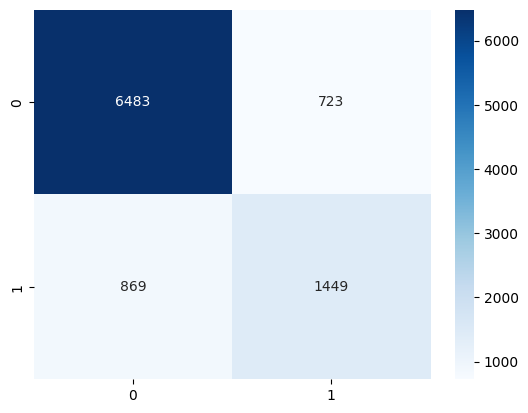

In [33]:
cm = confusion_matrix(Ytest, predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(Xtrain, Ytrain)
predict2 = LogReg.predict(Xtest)
report = classification_report(Ytest, predict2, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
<=50K,0.843228,0.938246,0.888203,7206.000000
>50K,0.704515,0.457722,0.554916,2318.000000
accuracy,0.821294,0.821294,0.821294,0.821294
macro avg,0.773872,0.697984,0.721560,9524.000000
weighted avg,0.809467,0.821294,0.807086,9524.000000


<Axes: >

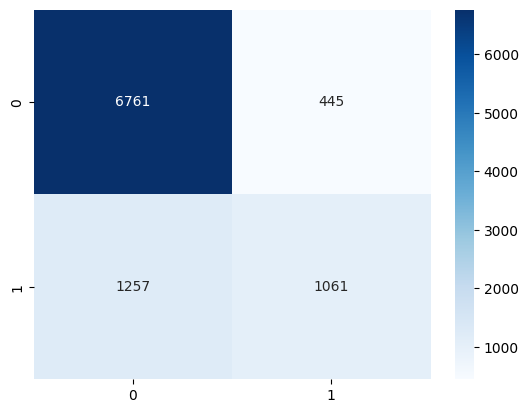

In [35]:
cm = confusion_matrix(Ytest, predict2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Support Vector Machine (SVM)

In [36]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(Xtrain, Ytrain)
predict3 = SVM.predict(Xtest)

<Axes: >

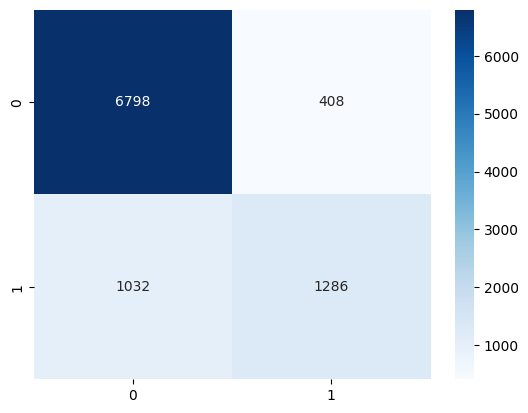

In [37]:
cm = confusion_matrix(Ytest, predict3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## **Deep Learning: Multi Layer Perceptron (MLP)**

In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver="adam", hidden_layer_sizes=(24,15), random_state=2, max_iter=10000)
clf.fit(Xtrain,Ytrain)
predict4 = clf.predict(Xtest)
accuracy_score(predict4, Ytest)

0.8513229735405292

In [39]:
report = classification_report(Ytest, predict3, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
<=50K,0.868199,0.943381,0.904230,7206.000000
>50K,0.759150,0.554789,0.641077,2318.000000
accuracy,0.848803,0.848803,0.848803,0.848803
macro avg,0.813675,0.749085,0.772653,9524.000000
weighted avg,0.841658,0.848803,0.840182,9524.000000


<Axes: >

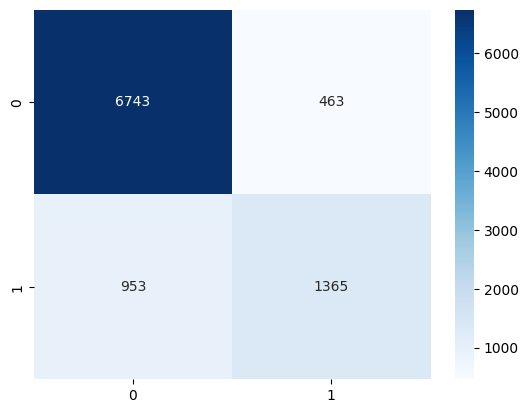

In [40]:
cm = confusion_matrix(Ytest, predict4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [41]:
report = classification_report(Ytest, predict4, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
<=50K,0.876169,0.935748,0.904979,7206.000000
>50K,0.746718,0.588870,0.658466,2318.000000
accuracy,0.851323,0.851323,0.851323,0.851323
macro avg,0.811444,0.762309,0.781723,9524.000000
weighted avg,0.844663,0.851323,0.844982,9524.000000


## **Pipelining**

### ML Models Comparision


=== Logistic ===
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7206
        >50K       0.70      0.46      0.55      2318

    accuracy                           0.82      9524
   macro avg       0.77      0.70      0.72      9524
weighted avg       0.81      0.82      0.81      9524



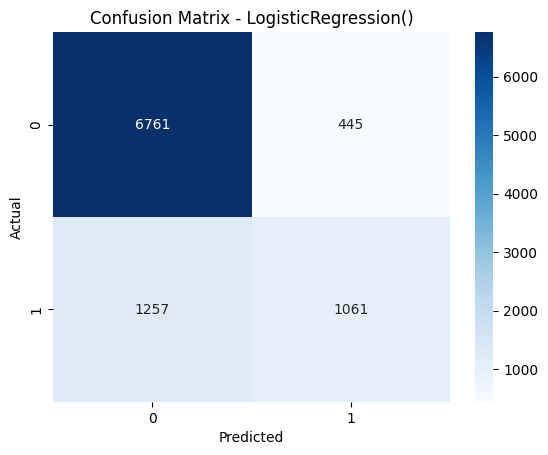


=== KNN ===
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      7206
        >50K       0.67      0.63      0.65      2318

    accuracy                           0.83      9524
   macro avg       0.77      0.76      0.77      9524
weighted avg       0.83      0.83      0.83      9524



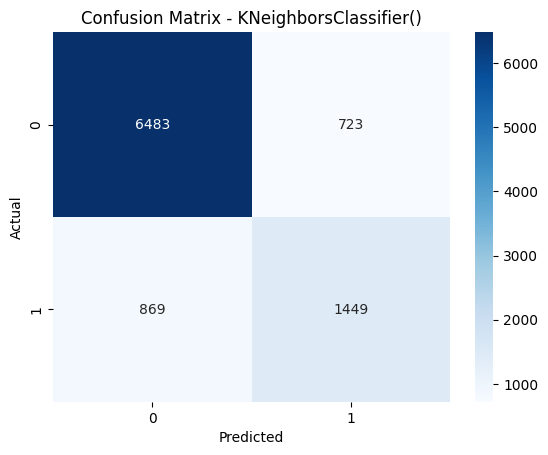


=== SVM ===
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      7206
        >50K       0.76      0.55      0.64      2318

    accuracy                           0.85      9524
   macro avg       0.81      0.75      0.77      9524
weighted avg       0.84      0.85      0.84      9524



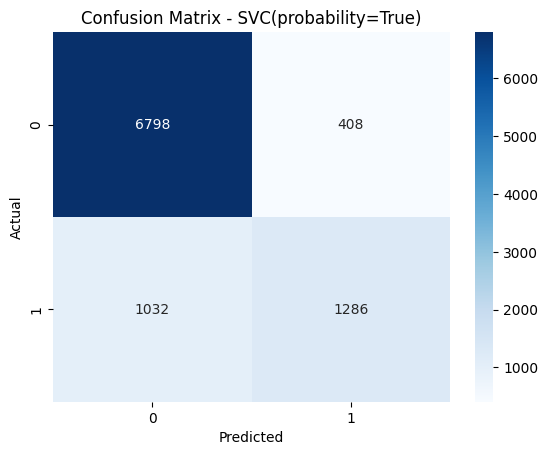

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

models1 = {
    'Logistic': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}
results = {}
for name, model in models1.items():
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', model)
    ])
    
    pipe.fit(Xtrain, Ytrain)
    preds = pipe.predict(Xtest)
    
    print(f"\n=== {name} ===")
    print(classification_report(Ytest, preds))
    report = classification_report(Ytest, preds, output_dict=True)
    metrics = report["weighted avg"]
    
    
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": metrics["precision"],
        "Recall": metrics["recall"],
        "F1-score": metrics["f1-score"]
    }

    df_results = pd.DataFrame(results).T  
    df_results = df_results.round(3)

    cm = confusion_matrix(Ytest, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### DL Models Comparision

#### Basic MLP:

1 hidden layer

In [43]:
def build_basic_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#### Deelp MLP:

Batch Normalization and Dropout to prevent overfitting.

In [44]:
def build_deep_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasClassifier
import tensorflow as tf


models2 = {
    'Basic MLP': KerasClassifier(model=build_basic_model, epochs=50, verbose=0),
    'Deep MLP': KerasClassifier(model=build_deep_model, epochs=50, verbose=0),
}


In [46]:
for name, model in models2.items():
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', model)
    ])
    
    pipe.fit(Xtrain, Ytrain)
    preds = pipe.predict(Xtest)
    
    print(f"\n=== {name} ===")
    print(classification_report(Ytest, preds))
    report = classification_report(Ytest, preds, output_dict=True)
    metrics = report["weighted avg"]
    
    
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": metrics["precision"],
        "Recall": metrics["recall"],
        "F1-score": metrics["f1-score"]
    }

    df_results = pd.DataFrame(results).T  
    df_results = df_results.round(3)


=== Basic MLP ===
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7206
        >50K       0.74      0.61      0.67      2318

    accuracy                           0.85      9524
   macro avg       0.81      0.77      0.79      9524
weighted avg       0.85      0.85      0.85      9524


=== Deep MLP ===
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7206
        >50K       0.74      0.59      0.66      2318

    accuracy                           0.85      9524
   macro avg       0.81      0.76      0.78      9524
weighted avg       0.84      0.85      0.84      9524



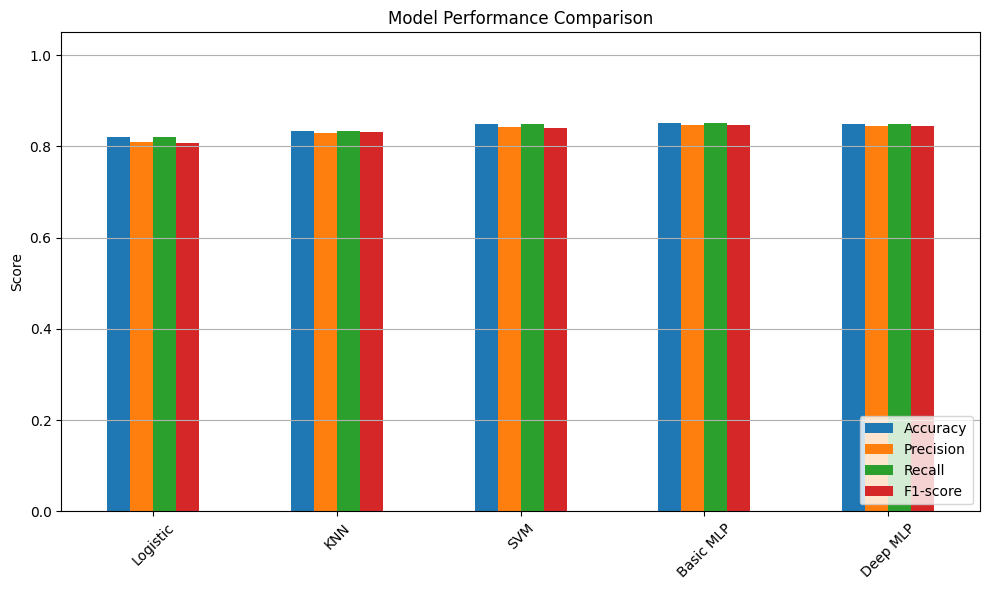

In [47]:
df_results.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [75]:
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,10,2,6,0,2,1,97,0,40,39,>50K
4,18,2,10,4,8,3,4,0,0,0,30,39,<=50K


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
import joblib

target = 'income'
numerical_features = ['age', 'educational-num', 'hours-per-week']
categorical_features = [
    'workclass', 'marital-status', 'occupation', 'relationship',
    'race', 'gender', 'native-country'
]

# Create features (X) and labels (y)
X = df1[numerical_features + categorical_features]
y = df1[target]

# Split the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Create the pipeline with LogisticRegression (you can swap in LinearSVC if needed)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Fit the pipeline
pipeline.fit(Xtrain, Ytrain)

# Save the trained pipeline to disk
joblib.dump(pipeline, 'best_model.pkl')
print("✅ Model trained and saved as 'best_model.pkl'")


✅ Model trained and saved as 'best_model.pkl'


In [103]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained pipeline
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Classifying Employee Salary", page_icon="🏢", layout="centered")

st.title("💼 Employee Salary Classification by David")
st.markdown("Predicting if an Employee salary is >50K or <=50K based on the given input")

# Sidebar inputs
st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
edu_num = st.sidebar.slider("Education Number (e.g., 9 = HS-grad, 13 = Bachelors)", 1, 16, 10)
workclass = st.sidebar.selectbox("Workclass", [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov",
    "Local-gov", "State-gov", "Without-pay", "Never-worked", "Other"
])
marital_status = st.sidebar.selectbox("Marital Status", [
    "Never-married", "Married-civ-spouse", "Divorced", "Separated", "Widowed", "Married-spouse-absent"
])
occupation = st.sidebar.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
relationship = st.sidebar.selectbox("Relationship", [
    "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
])
race = st.sidebar.selectbox("Race", ["White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"])
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
native_country = st.sidebar.selectbox("Native Country", ["United-States", "Mexico", "Philippines", "Germany", "Canada", "India", "Other"])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)

# Input DataFrame (matches model pipeline columns)
input_df = pd.DataFrame({
    'age': [age],
    'educational-num': [edu_num],
    'workclass': [workclass],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'native-country': [native_country],
    'hours-per-week': [hours_per_week]
})

st.write("### 🔎 Input Data")
st.write(input_df)

if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting app.py
